## Human Stress Detection in and through Sleep

### Human Stress Detection in and through Sleep by monitoring physiological data.

Considering today’s lifestyle, people just sleep forgetting the benefits sleep provides to the human body. Smart-Yoga Pillow (SaYoPillow) is proposed to help in understanding the relationship between stress and sleep and to fully materialize the idea of “Smart-Sleeping” by proposing an edge device. An edge processor with a model analyzing the physiological changes that occur during sleep along with the sleeping habits is proposed. Based on these changes during sleep, stress prediction for the following day is proposed. The secure transfer of the analyzed stress data along with the average physiological changes to the IoT cloud for storage is implemented. A secure transfer of any data from the cloud to any third-party applications is also proposed. A user interface is provided allowing the user to control the data accessibility and visibility. SaYoPillow is novel, with security features as well as consideration of sleeping habits for stress reduction, with an accuracy of up to 96%.
In SayoPillow.csv, you will see the relationship between the parameters- snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high) that has been generated from Literature Review. (No human subjects were considered)
If you are using this dataset or found any of this information contributing towards your research, please cite:

L. Rachakonda, A. K. Bapatla, S. P. Mohanty, and E. Kougianos, “SaYoPillow: Blockchain-Integrated Privacy-Assured IoMT Framework for Stress Management Considering Sleeping Habits”, IEEE Transactions on Consumer Electronics (TCE), Vol. 67, No. 1, Feb 2021, pp. 20-29.
L. Rachakonda, S. P. Mohanty, E. Kougianos, K. Karunakaran, and M. Ganapathiraju, “Smart-Pillow: An IoT based Device for Stress Detection Considering Sleeping Habits”, in Proceedings of the 4th IEEE International Symposium on Smart Electronic Systems (iSES), 2018, pp. 161--166.

Source: https://www.kaggle.com/laavanya/human-stress-detection-in-and-through-sleep

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Column Description

#### Columns:

- Snoring Range = **sr**
- Respiration Rate = **rr**
- Body Temperature = **t**
- Limb Movement Rate = **lm**
- Blood Oxygen Levels = **bo**
- Eye Movement = **rem**
- Number of Hours of Sleep = **sr.1**
- Heart Rate = **hr** 
- Stress Levels = **sl**

In [2]:
df = pd.read_csv('data/SaYoPillow.csv')
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


<AxesSubplot:>

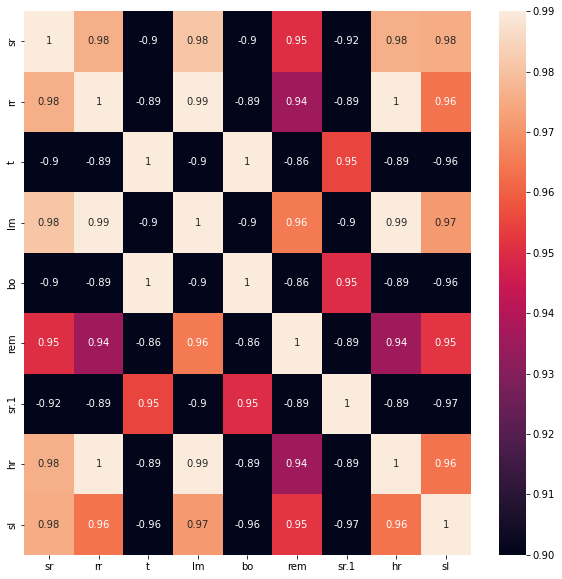

In [4]:
fig, ax = plt.subplots(figsize=(10,10))  
corr = df.corr()
sb.heatmap(corr, annot=True, vmin=0.9, vmax=0.99)

In [5]:
df.sl.value_counts()

3    126
1    126
0    126
2    126
4    126
Name: sl, dtype: int64

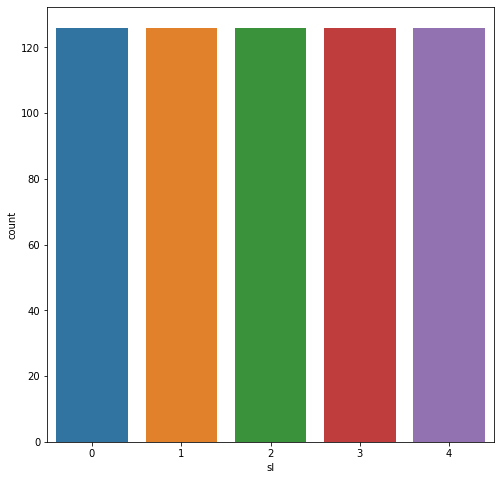

In [6]:
fig, ax = plt.subplots(figsize=(8,8))  
barp = sb.countplot(x="sl", data=df)

In [7]:
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve

In [9]:
scaler = MinMaxScaler()

In [10]:
X = df.drop(columns = ['sl'])
X[X.columns] = scaler.fit_transform(X[X.columns])
Y = df['sl']

print(X.shape, Y.shape)
X.head()

(630, 8) (630,)


,sr,rr,t,lm,bo,rem,sr.1,hr
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

### MLPClassifier

In [27]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000).fit(X_train, y_train)

/opt/anaconda3/envs/SDIC/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [31]:
mlp_y_pred = mlp_classifier.predict(X_test)

In [38]:
c_report = classification_report(y_test, mlp_y_pred)

print("Classification report for classifier %s:\n%s\n"
      % (mlp_classifier, c_report))
cm = confusion_matrix(y_test, mlp_y_pred)
cm

Classification report for classifier MLPClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        37

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158




array([[36,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0],
       [ 0,  0, 30,  0,  0],
       [ 0,  0,  0, 30,  0],
       [ 0,  0,  0,  0, 37]])

In [37]:
test_acc = accuracy_score(y_test, mlp_y_pred) * 100.
loss_values = mlp_classifier.loss_curve_

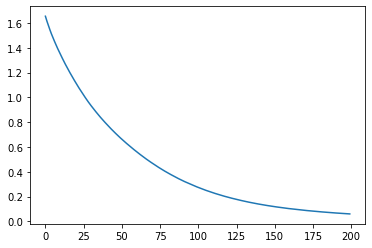

In [36]:
plt.plot(loss_values)
plt.show()

### TensorFlow

In [12]:
SVC_classifier = SVC()
SVC_classifier.fit(X_train, y_train)

SVC()

In [13]:
svc_y_pred = SVC_classifier.predict(X_test)

In [14]:
cm = confusion_matrix(y_test, svc_y_pred)
cm

array([[36,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0],
       [ 0,  0, 30,  0,  0],
       [ 0,  0,  0, 30,  0],
       [ 0,  0,  0,  0, 37]])

### Perceptron

In [15]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

In [16]:
perceptron_y_pred = SVC_classifier.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, perceptron_y_pred)
cm

array([[36,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0],
       [ 0,  0, 30,  0,  0],
       [ 0,  0,  0, 30,  0],
       [ 0,  0,  0,  0, 37]])

In [18]:
accuracy_score(y_test, perceptron_y_pred)

1.0